In [1]:
%load_ext autoreload
%autoreload 2
%load_ext lab_black

In [16]:
import tensorflow as tf
from tensorflow import keras
import os
import numpy as np
from PIL import Image
from tqdm import tqdm
import matplotlib.pyplot as plt
import sys

sys.path.append("../")

from utils.dataset import DIV2K_Dataset
from utils.model import create_model
from utils.constants import HR_IMG_SIZE, DOWNSAMPLE_MODE

# Data

In [18]:
dataset = DIV2K_Dataset(
    # hr_image_folder="../data/DIV2K_train_HR/",
    hr_image_folder="../data/DIV2K_subset/",
    batch_size=1,
)

# Model

In [8]:
model = create_model(d=56, s=12, m=4)
# keras.utils.plot_model(model, "my_first_model_with_shape_info.png", show_shapes=True)

In [9]:
# model.summary()

## Training

In [10]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices("GPU")))

Num GPUs Available:  1


In [11]:
model.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.001),
    loss="mean_squared_error",
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    monitor="loss", factor=0.25, patience=200, min_lr=0.00000001, verbose=1
)


history = model.fit(dataset, epochs=3000, steps_per_epoch=1, callbacks=[reduce_lr])

Epoch 1/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.1308
Epoch 2/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0322
Epoch 3/3000
1/1 [==============================] - 0s 2ms/step - loss: 1.1856
Epoch 4/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0819
Epoch 5/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0323
Epoch 6/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.1002
Epoch 7/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0712
Epoch 8/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.0320
Epoch 9/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0267
Epoch 10/3000
1/1 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 11/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 12/3000
1/1 [==============================] - 0s 2ms/step - loss: 0.0156
Epoch 13/3000
1/1 [==============================

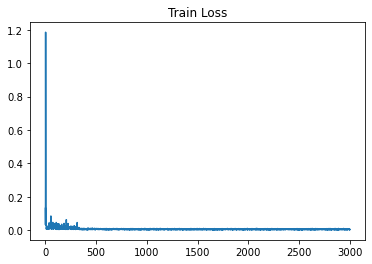

In [13]:
plt.plot(history.history["loss"])
plt.title("Train Loss")
plt.show()

# Visualizing

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


-0.08290405 1.2600061


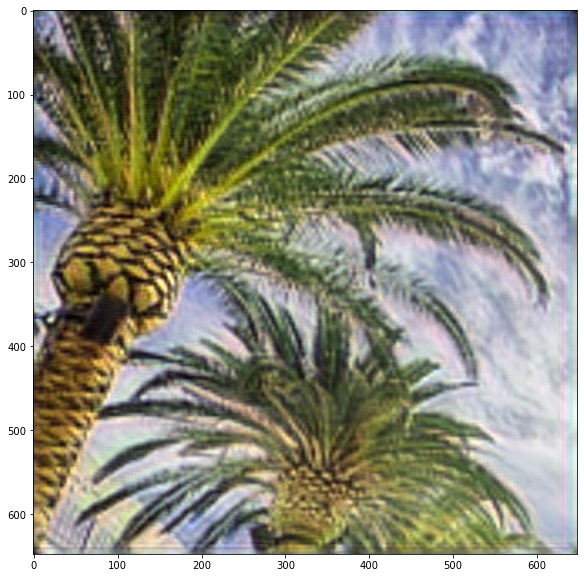

In [19]:
batch = dataset.__getitem__(0)

preds = model.predict(batch[0])
print(preds.min(), preds.max())
plt.figure(figsize=[10, 10])
plt.imshow(preds[0])

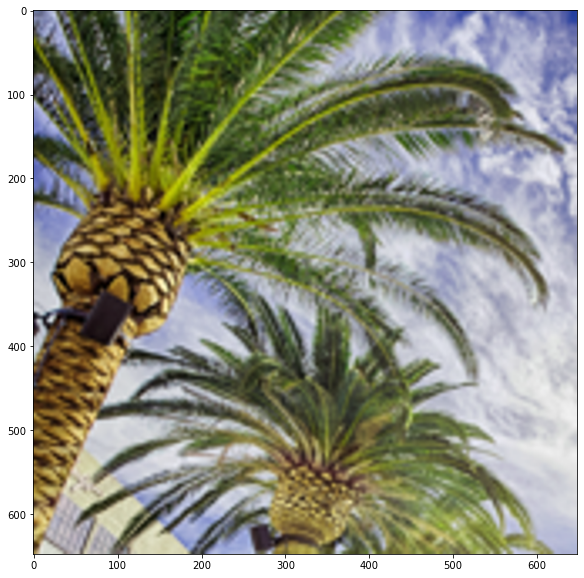

In [20]:
lr_image = Image.fromarray(np.array(batch[0][0] * 255, dtype="uint8"))
lr_image_resized = lr_image.resize(HR_IMG_SIZE, resample=DOWNSAMPLE_MODE)
plt.figure(figsize=[10, 10])
plt.imshow(lr_image_resized)

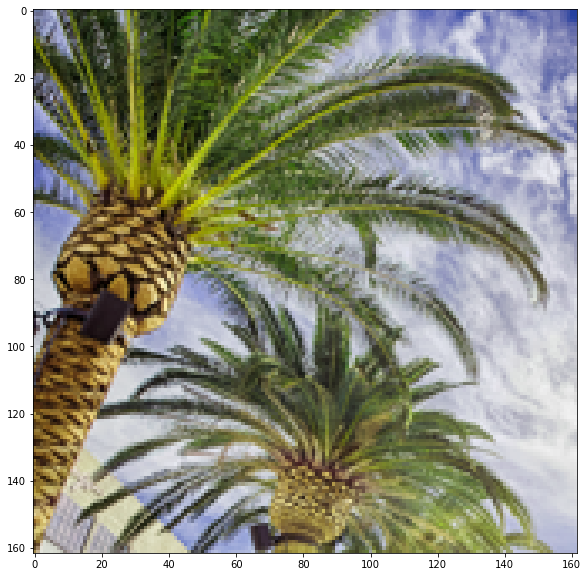

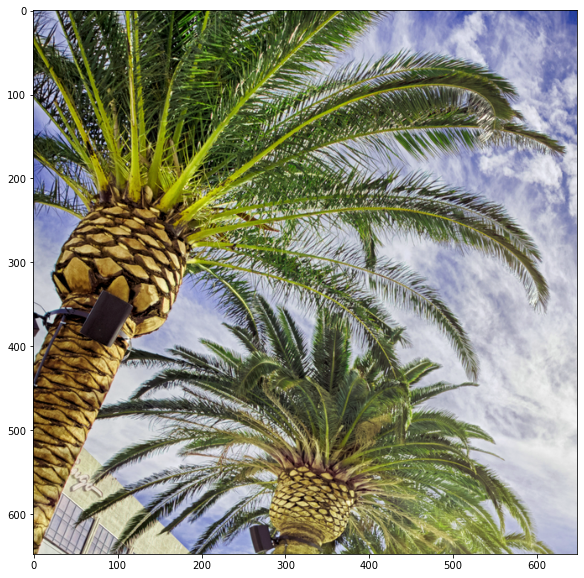

In [21]:
plt.figure(figsize=[10, 10])
plt.imshow(batch[0][0])

plt.figure(figsize=[10, 10])
plt.imshow(batch[1][0])